Number of Records = 58
First Year: 1960
Last Year: 2017


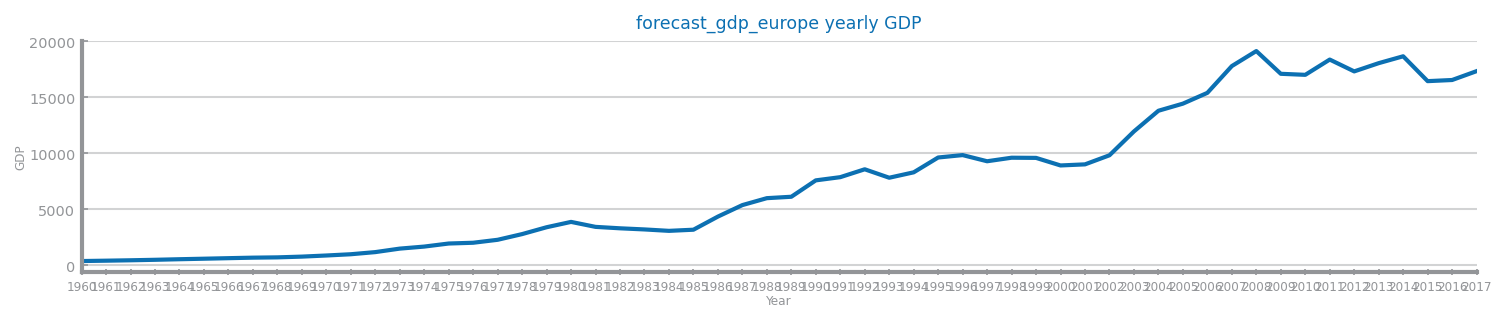

In [3]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# File details
file_tag = "forecast_gdp_europe"
target = "GDP"

# Load data
data: DataFrame = read_csv(
    "/Users/dominikfrank/Library/Mobile Documents/com~apple~CloudDocs/Desktop/University/Master/Semester 1/PII/Data Science/Code for Project/DataScience/forecast_gdp_europe.csv",
    index_col="Year",  # Adjust to 'Year' if that's the correct column name
    sep=",",  # Comma-separated values
    decimal=".",  # Use period as decimal separator
    parse_dates=["Year"],  # Parse the 'Year' column as datetime
    infer_datetime_format=True,  # Automatically infer datetime format
)

# Extract target series
series: Series = data[target]

# Profiling output
print("Number of Records =", series.shape[0])
print("First Year:", series.index[0].year)
print("Last Year:", series.index[-1].year)

# Plot univariate time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.year.to_list(),  # Use year values for the x-axis
    series.to_list(),  # GDP values
    xlabel="Year",  # Correct x-axis label
    ylabel=target,
    title=f"{file_tag} yearly {target}",  # Correct title to reflect yearly data
)
show()


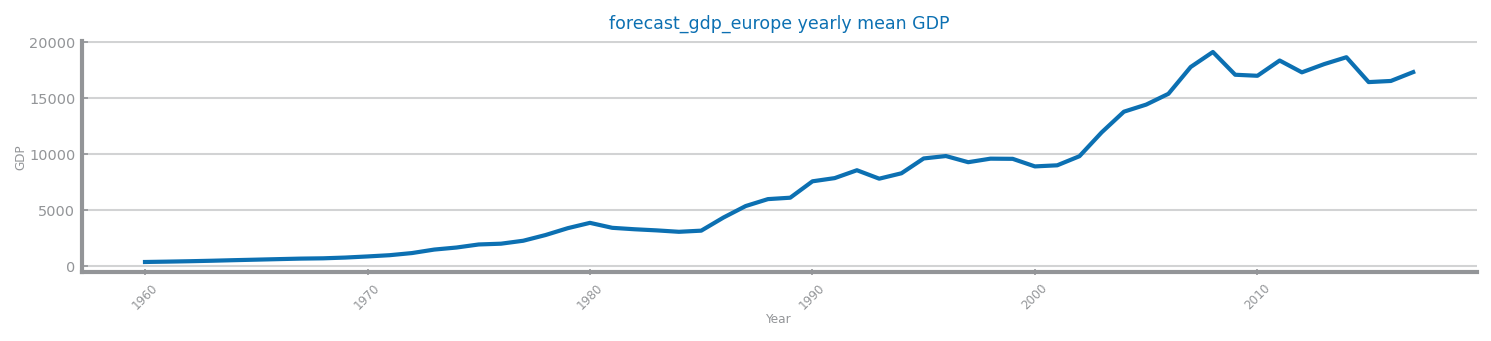

In [6]:
from pandas import Series, DataFrame, Index, Period
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_line_chart, HEIGHT

# Define the aggregation function
def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "Y",  # Changed to yearly aggregation
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    df.index = df.index.to_timestamp()  # Convert back to timestamp for plotting

    return df

# Perform yearly aggregation on the 'GDP' series
ss_years: Series = ts_aggregation_by(series, "Y")

# Plot the yearly aggregated time series
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_years.index.to_list(),
    ss_years.to_list(),
    xlabel="Year",
    ylabel=target,
    title=f"{file_tag} yearly mean {target}",
)
show()


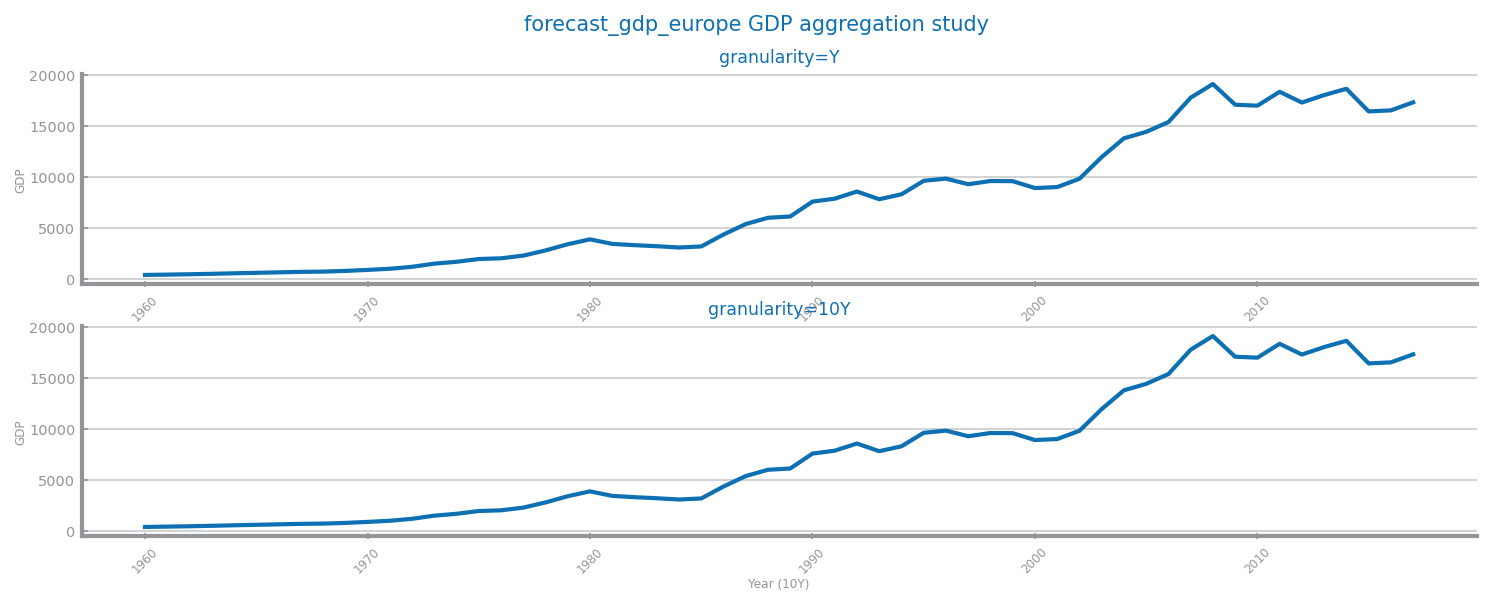

In [10]:
from matplotlib.pyplot import subplots, show
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from pandas import Series

# Define granularity levels to study
grans: list[str] = ["Y", "10Y"]  # Yearly, Decadal

# Create subplots for each granularity level
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

# Loop through each granularity level
for i in range(len(grans)):
    # Aggregate the time series to the current granularity level
    ss: Series = ts_aggregation_by(series, grans[i])

    # Plot the aggregated time series on the respective subplot
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",  # Label with granularity level
        ylabel=target,
        title=f"granularity={grans[i]}",  # Title for the subplot
    )

# Display the plots
show()
